1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

data.zip
└── data
   ├── 2020-12-30
   │  ├── FirstName_LastName1
   │  │  └── data.csv
   │  ├── FirstName_LastName2
   │  │   └── data.csv
   │  └── FirstName_LastName3
   │      └── data.csv
   ├── 2020-12-31
      ├── FirstName_LastName1
      │   └── data.csv
      └── FirstName_LastName5
          └── data.csv

In [83]:
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df = pd.DataFrame()

In [85]:
os.getcwd()

'C:\\Users\\R\\PycharmProjects\\pythonProject1'

In [86]:
# открываем архив
with zipfile.ZipFile('data/data.zip', 'r') as zip_ref:
    # Список всех файлов и папок в архиве
    zip_contents = zip_ref.namelist()

    # Перебор всех файлов в архиве
    for file in zip_contents:
        # Проверка, является ли файл CSV файлом
        if file.endswith('.csv'):
            _, date, name, _ = file.split('/')
            # Открытие CSV файла из архива
            with zip_ref.open(file) as csv_file:
                # Чтение содержимого файла в DataFrame
                temp_df = pd.read_csv(csv_file)
                temp_df['name'] = name
                temp_df['date'] = date
                # добавление информации в основной датафрейм
                df = pd.concat((df, temp_df), axis=0)

In [87]:
df['date'] = pd.to_datetime(df['date'])
df.drop(columns=['Unnamed: 0'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [88]:
df

,product_id,quantity,name,date
0,82,4,Vasiliy_Ivanov,2020-12-09
1,74,2,Vasiliy_Ivanov,2020-12-09
2,54,3,Vasiliy_Ivanov,2020-12-09
3,64,2,Rostislav_Petrov,2020-12-09
4,66,4,Rostislav_Petrov,2020-12-09
...,...,...,...,...
156,57,1,Alexey_Smirnov,2020-12-03
157,14,2,Alexey_Smirnov,2020-12-03
158,52,1,Alexey_Smirnov,2020-12-03
159,1,4,Alexey_Smirnov,2020-12-03


2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [89]:
customer_purchases = df\
    .groupby('name')\
    .agg({'quantity': 'sum'})\
    .sort_values(by='quantity', ascending=False)

customer_purchases

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


In [90]:
max_num_purchases = customer_purchases.quantity.max()
max_num_purchases

52

In [91]:
top_customers = customer_purchases.query('quantity == @max_num_purchases').index.to_list()
top_customers

['Alexey_Smirnov', 'Petr_Smirnov']

3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот.

In [92]:
top_10_product_id = df\
                    .groupby('product_id', as_index=False)\
                    .agg({'quantity': 'sum'})\
                    .sort_values(by='quantity', ascending=False)\
                    .head(10)

top_10_product_id

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<Axes: xlabel='product_id', ylabel='quantity'>

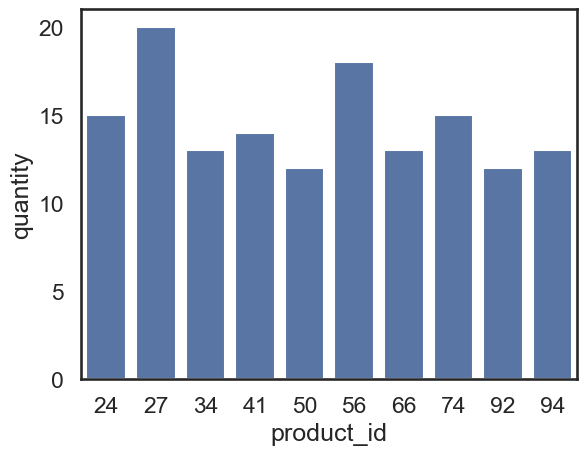

In [93]:
sns.barplot(data=top_10_product_id, x='product_id', y='quantity')

4. Сколько было продано единиц товара с product_id==56?


In [94]:
top_10_product_id.query('product_id == 56')

,product_id,quantity
42,56,18


5. Визуализируйте продажи по дням недели.

In [108]:
sales_by_days = df[['product_id', 'quantity']].copy()
sales_by_days['days'] = df['date'].dt.day_name()

sales_by_days = sales_by_days.groupby('days', as_index=False).agg({'quantity':'sum'})
sales_by_days

,days,quantity
0,Friday,113
1,Monday,94
2,Saturday,61
3,Sunday,15
4,Thursday,60
5,Tuesday,68
6,Wednesday,69


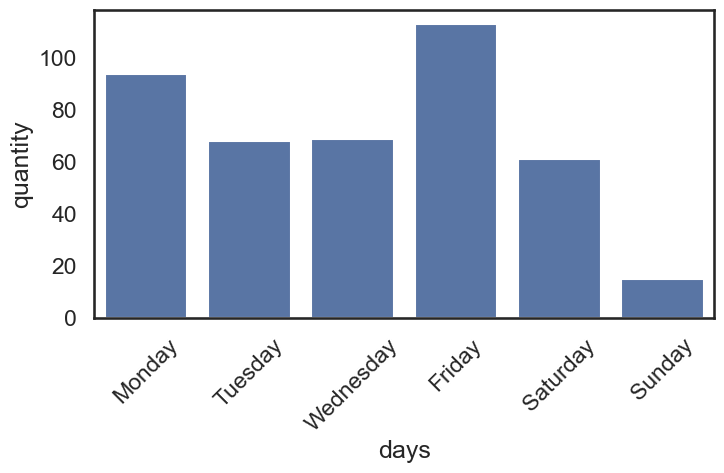

In [109]:
plt.figure(figsize=(8, 4))  # Размеры можно адаптировать по вашему усмотрению
order=['Monday', 'Tuesday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=sales_by_days, x='days', y='quantity', order=order)
plt.xticks(rotation=45)
plt.show()

6. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)?
Повтором считать покупку товара с одинаковым product_id, совершенную в разные дни.

In [122]:
repeat_purchases = df\
    .groupby(['name', 'product_id'])\
    .agg({'date': pd.Series.nunique})\
    .query('date > 1')

repeat_purchases

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


In [139]:
repeat_purchases.index.get_level_values('name').tolist()

['Anton_Ivanov', 'Petr_Fedorov']